In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import allensdk as a
import numpy as np
import seaborn as sns

/Users/marta/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [47]:
from allensdk.core.cell_types_cache import CellTypesCache

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path (like this), it will go
# into your current working directory
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')


In [48]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
print("Mouse cells: %d" % len(cells))

# download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features)


print("Ephys. features available for %d cells" % len(ef_df))




Mouse cells: 1058
Ephys. features available for 1337 cells


In [49]:
cells_df=pd.DataFrame(cells)

In [50]:
cells_df.head()


,apical,cell_prep_sample_id,cell_reporter,cell_reporter_id,cell_soma_locations,cortex_layer_id,data,data_sets,dendrite_type,disease_categories,...,species,specimen_id_path,specimen_tags,sphinx_id,structure,structure_id,tissue_ph,transgenic_line,treatment_id,weight
0,intact,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.285936747471, u'speci...",None,None,[],spiny,[],...,Mus musculus,/504923436/505798538/505804043/505808144/,"[{u'id': 470927414, u'ar_association_key_name'...",264856,"{u'st_level': None, u'graph_id': 1, u'name': u...",721,None,Nr5a1-Cre,598634036,9000
1,truncated,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.586812059837, u'speci...",None,None,[],spiny,[],...,Mus musculus,/397332031/457925382/458216921/469763389/,"[{u'id': 470927257, u'ar_association_key_name'...",256762,"{u'st_level': None, u'graph_id': 1, u'name': u...",721,None,Rorb-IRES2-Cre,598634036,9000
2,NA,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 1.0, u'specimen_id': 56...",None,None,[],aspiny,[],...,Mus musculus,/565087390/566486723/566488302/566559909/,"[{u'id': 470927759, u'ar_association_key_name'...",289642,"{u'st_level': None, u'graph_id': 1, u'name': u...",33,None,Nkx2-1-CreERT2,598634036,9000
3,intact,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.455007800183, u'speci...",None,None,"[{u'name': u'T301-Ax.150428_01_B05_475459689',...",spiny,[],...,Mus musculus,/475196480/475458297/475458647/475459689/,"[{u'id': 470927414, u'ar_association_key_name'...",257002,"{u'st_level': None, u'graph_id': 1, u'name': u...",721,None,Nr5a1-Cre,598634036,9000
4,intact,None,"{u'id': 491913824, u'name': u'cre reporter neg...",491913824,"[{u'normalized_depth': 0.710055725142, u'speci...",None,None,[],spiny,[],...,Mus musculus,/488425797/488496844/488497123/488501165/,"[{u'id': 470927414, u'ar_association_key_name'...",259288,"{u'st_level': None, u'graph_id': 1, u'name': u...",778,None,Rorb-IRES2-Cre,598634036,9000


In [23]:
print cells_df.columns

Index([u'apical', u'cell_prep_sample_id', u'cell_reporter',
       u'cell_reporter_id', u'cell_soma_locations', u'cortex_layer_id',
       u'data', u'data_sets', u'dendrite_type', u'disease_categories',
       u'donor', u'donor_id', u'ephys_features', u'ephys_result_id',
       u'external_specimen_name', u'failed_facet', u'has_morphology',
       u'has_reconstruction', u'hemisphere', u'id', u'is_cell_specimen',
       u'is_ish', u'name', u'neuron_reconstructions', u'parent_id',
       u'parent_x_coord', u'parent_y_coord', u'parent_z_coord',
       u'pinned_radius', u'reporter_status', u'rna_integrity_number',
       u'species', u'specimen_id_path', u'specimen_tags', u'sphinx_id',
       u'structure', u'structure_id', u'tissue_ph', u'transgenic_line',
       u'treatment_id', u'weight'],
      dtype='object')


In [60]:
cells = ctc.get_cells()
# we want to add dendrite type as a column to the ephys. features dataframe
# first build an index on cell specimen ID, then create array of dendrite types
cell_index = { c['id']: c for c in cells }
#print cell_index

dendrite_types = [ cell_index[cid]['dendrite_type'] for cid in ef_df['specimen_id'] ]
lines=[cell_index[cid]['transgenic_line'] for cid in ef_df['specimen_id'] ]
# now add the new column
ef_df['dendrite_type'] = pd.Series(dendrite_types, index=ef_df.index)
ef_df['transgenic_line']= pd.Series(lines, index=ef_df.index)


print len(ef_df)

1337


In [375]:

trans_line_target=ef_df.transgenic_line.map({'Nkx2-CreERT2': 'inh', 'Gad2-IRES-Cre': 'inh', 'Sst-IRES-Cre': 'inh',
                                             'Pvalb-IRES-Cre':'inh', 'Htr3a-Cre_NO152': 'inh', 'Vip-IRES-Cre': 'inh',
                                             'Chat-IRES-Cre-neo': 'inh','Ndnf-IRES2-dgCre':'inh', 0: 'unknown', 
                                             'Rorb-IRES2-Cre' : 'exc','Cux2-CreERT2':'exc', 'Scnn1a-Tg3-Cre': 'exc',
                                             'Nr5a1-Cre':'exc', 'Rbp4-Cre_KL100':'exc', 'Ctgf-T2A-dgCre':'exc',
                                             'Emx1-IRES-Cre':'exc', 'Slc17a6-IRES-Cre': 'exc', 'Ntsr1-Cre_GN220':'exc',
                                             'Chrna2-Cre_OE25':'exc', 'Scnn1a-Tg2-Cre':'exc'})

      
ef_df['trans_line_target']= pd.Series(trans_line_target, index=ef_df.index)        

In [377]:
ef_df.head(100)



,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,trans_line_target,fAHP_amplitude,spike_height
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,3.904747,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,exc,9.718754,83.156254
1,0.064384,76.283333,26.135000,0.195247,1.102660,4.005247,1.024873,-48.718750,-49.875001,-51.500004,...,4.231335,4.299535,3.939083,-78.593750,-66.085068,spiny,Chrna2-Cre_OE25,exc,4.499996,100.718758
2,0.000000,0.000000,-4.600001,0.055443,1.104820,9.092507,1.025024,-48.093750,-49.541669,-50.312503,...,2.154281,1.486651,2.400687,-87.156250,-75.141449,spiny,0,unknown,NaN,NaN
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,2.026000,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,inh,13.875000,45.312504
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,4.208485,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,exc,10.749996,71.437504
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,2.992793,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,exc,8.406254,53.468752
6,0.093492,112.245000,3.015000,0.150000,1.109200,5.458287,1.025020,-51.062504,-57.916670,-56.531254,...,2.199872,2.220031,2.235442,-95.843758,-81.065971,spiny,0,unknown,NaN,NaN
7,0.025413,59.215625,10.571250,0.397263,1.230720,4.531655,1.024268,-54.718750,-54.687503,-59.166670,...,1.473594,1.444992,1.653886,-94.312508,-70.492218,aspiny,Scnn1a-Tg2-Cre,exc,19.937500,57.500002
8,0.020972,50.538421,51.966872,0.441304,1.117355,1.598333,1.028003,-51.906254,-51.354170,-52.833337,...,3.043080,3.364607,3.081809,-105.687508,-63.734398,aspiny,Rorb-IRES2-Cre,exc,11.437500,54.562505
9,0.002560,18.282170,16.385625,0.656473,1.050440,7.520155,1.024666,-59.500000,-58.125004,-61.609378,...,1.608589,1.487978,1.822781,-89.437508,-73.008224,aspiny,Pvalb-IRES-Cre,inh,23.812496,56.625004


In [62]:
print ef_df.columns

Index([u'adaptation', u'avg_isi', u'electrode_0_pa', u'f_i_curve_slope',
       u'fast_trough_t_long_square', u'fast_trough_t_ramp',
       u'fast_trough_t_short_square', u'fast_trough_v_long_square',
       u'fast_trough_v_ramp', u'fast_trough_v_short_square', u'has_burst',
       u'has_delay', u'has_pause', u'id', u'input_resistance_mohm', u'latency',
       u'peak_t_long_square', u'peak_t_ramp', u'peak_t_short_square',
       u'peak_v_long_square', u'peak_v_ramp', u'peak_v_short_square',
       u'rheobase_sweep_id', u'rheobase_sweep_number', u'ri', u'sag',
       u'seal_gohm', u'slow_trough_t_long_square', u'slow_trough_t_ramp',
       u'slow_trough_t_short_square', u'slow_trough_v_long_square',
       u'slow_trough_v_ramp', u'slow_trough_v_short_square', u'specimen_id',
       u'threshold_i_long_square', u'threshold_i_ramp',
       u'threshold_i_short_square', u'threshold_t_long_square',
       u'threshold_t_ramp', u'threshold_t_short_square',
       u'threshold_v_long_square', u't

In [378]:
ef_df.dendrite_type.value_counts()

spiny             790
aspiny            505
sparsely spiny     29
Name: dendrite_type, dtype: int64

In [379]:
ef_df_mouse=ef_df[ef_df['transgenic_line']!=0]
print len(ef_df_mouse)

1052


In [380]:
ef_df_mouse.dendrite_type.value_counts()

spiny             574
aspiny            455
sparsely spiny     23
Name: dendrite_type, dtype: int64

In [381]:
ef_df_mouse.trans_line_target.value_counts()

exc    622
inh    407
Name: trans_line_target, dtype: int64

In [382]:
ef_df_mouse.transgenic_line.value_counts()

Rorb-IRES2-Cre       160
Pvalb-IRES-Cre       143
Sst-IRES-Cre         111
Htr3a-Cre_NO152       89
Nr5a1-Cre             77
Cux2-CreERT2          76
Rbp4-Cre_KL100        76
Scnn1a-Tg3-Cre        63
Ntsr1-Cre_GN220       59
Scnn1a-Tg2-Cre        48
Ctgf-T2A-dgCre        31
Chrna2-Cre_OE25       29
Nkx2-1-CreERT2        23
Chat-IRES-Cre-neo     20
Vip-IRES-Cre          18
Ndnf-IRES2-dgCre      15
Gad2-IRES-Cre         11
Slc17a6-IRES-Cre       3
Name: transgenic_line, dtype: int64

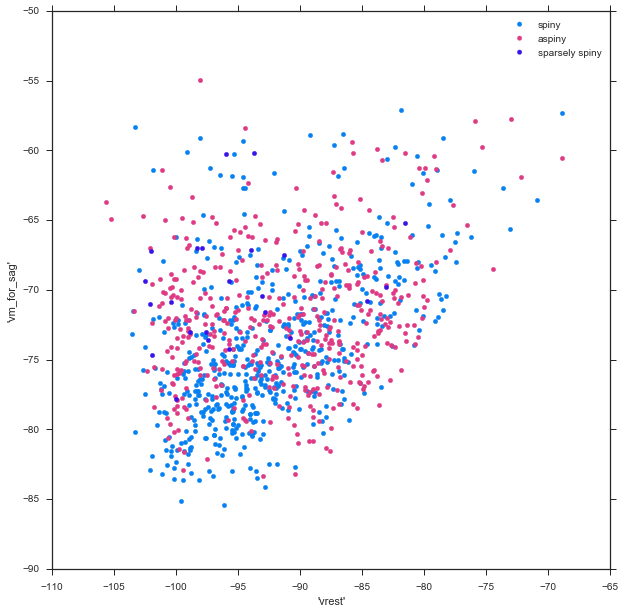

In [177]:

fig = plt.figure(figsize=(10,10))

for d_type, color in [["spiny", "#0781f2"], ["aspiny", "#df3b85"],["sparsely spiny", "#3a12ea"] ]:
    df = ef_df_mouse[ef_df_mouse['dendrite_type'] == d_type]
    plt.scatter(df['vm_for_sag'], 
                df['vrest'], 
                color=color, label=d_type)

    plt.ylabel("'vm_for_sag'")
    plt.xlabel("'vrest'")
    plt.legend(loc='best')
    
plt.show()

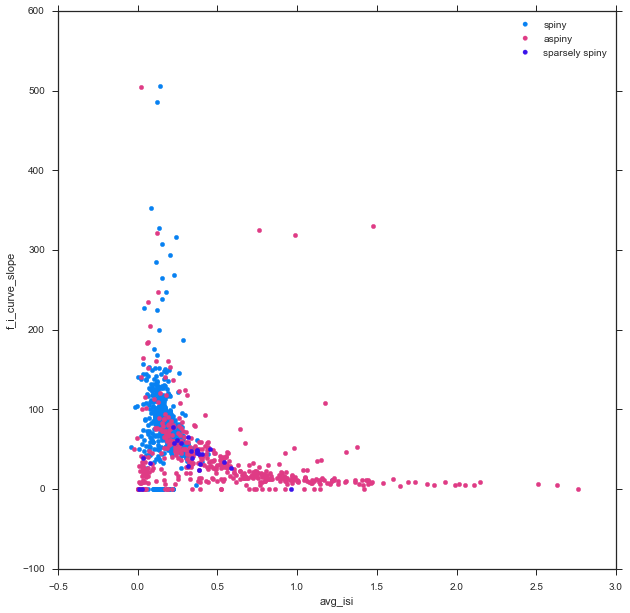

In [178]:

fig = plt.figure(figsize=(10,10))


for d_type, color in [ ["spiny", "#0781f2"], ["aspiny", "#df3b85"],["sparsely spiny", "#3a12ea"] ]:
    df = ef_df_mouse[ef_df_mouse['dendrite_type'] == d_type]
    plt.scatter(df['f_i_curve_slope'], 
                df['avg_isi'], 
                color=color, label=d_type)

    plt.ylabel('f_i_curve_slope')
    plt.xlabel('avg_isi')
    plt.legend(loc='best')
    
plt.show()

In [64]:
ef_df_mouse=ef_df_mouse.fillna(0)

In [170]:
High_RS = ef_df_mouse[ef_df_mouse['input_resistance_mohm']>500]
High_RS.head(15)

   
 

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,trans_line_target


In [171]:
#df = df[df.value != 123456.]
ef_df=ef_df_mouse[ef_df_mouse['input_resistance_mohm']<500]

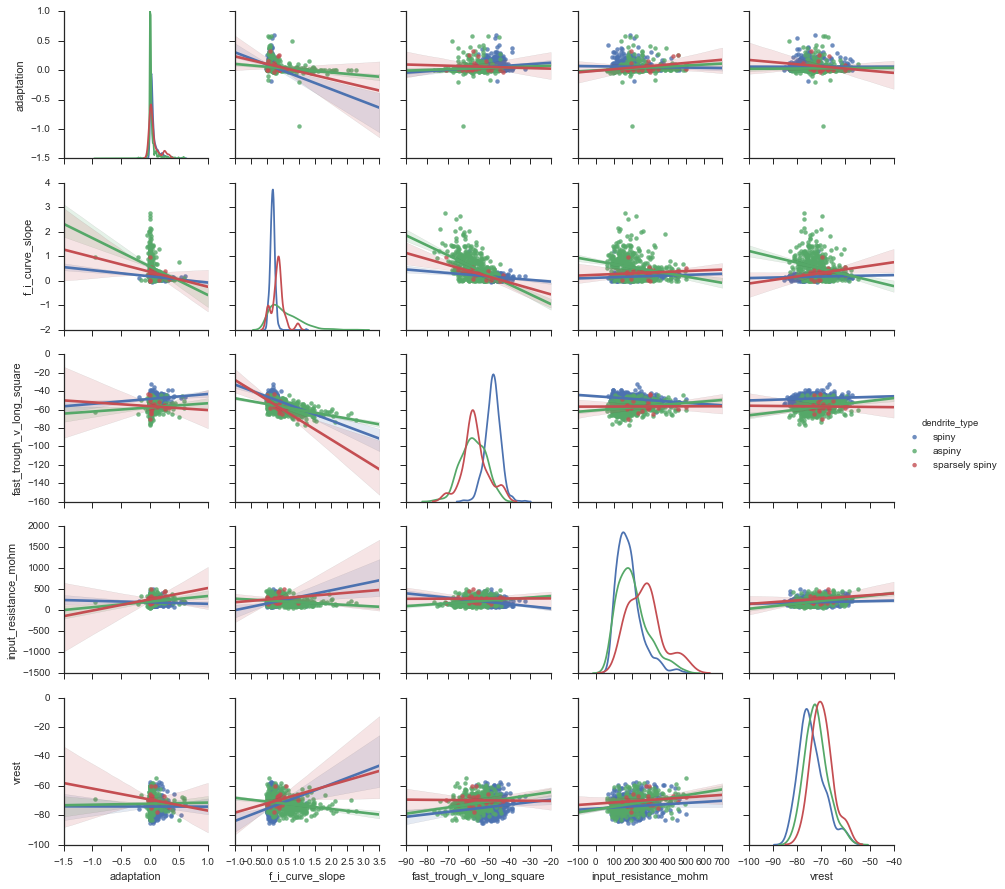

In [179]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='dendrite_type', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], diag_kind='kde')


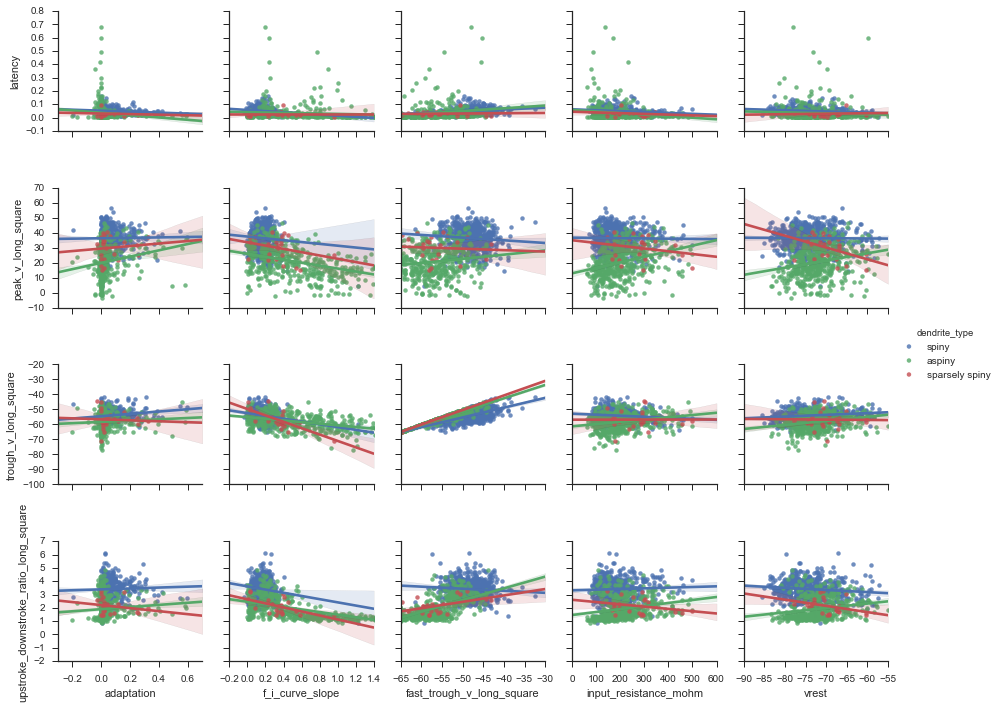

In [181]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='dendrite_type', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], diag_kind='kde')


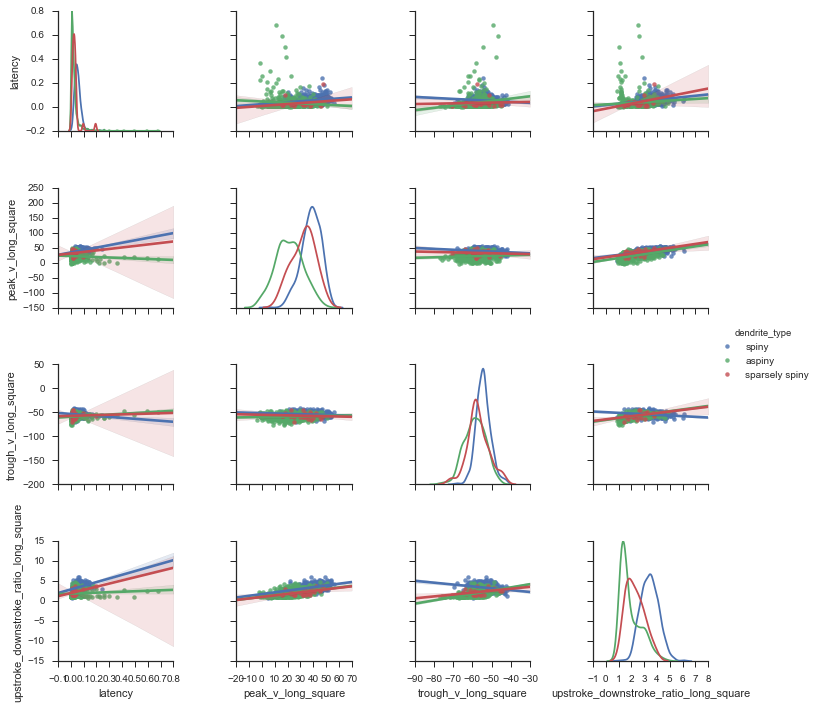

In [141]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse,kind='reg', hue='dendrite_type', x_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], diag_kind='kde')



In [116]:
s=ef_df['has_burst'].where(ef_df['has_burst']==True)
s=s.dropna()
p=ef_df['has_pause'].where(ef_df['has_burst']==True)
p=s.dropna()
k=ef_df['has_delay'].where(ef_df['has_burst']==True)
k=s.dropna()
print s,p,k

Series([], Name: has_burst, dtype: float64) Series([], Name: has_burst, dtype: float64) Series([], Name: has_burst, dtype: float64)


In [184]:
ef_df_mouse.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,trans_line_target
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,-56.812502,-69.306253,3.904747,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,exc
1,0.064384,76.283333,26.135000,0.195247,1.102660,4.005247,1.024873,-48.718750,-49.875001,-51.500004,...,-50.093753,-67.416669,4.231335,4.299535,3.939083,-78.593750,-66.085068,spiny,Chrna2-Cre_OE25,exc
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,-49.218753,-66.318753,2.026000,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,inh
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,-57.614586,-73.337500,4.208485,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,exc
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,exc


In [89]:
ef_df_description=ef_df.filter(items=['id',
'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag','seal_gohm','specimen_id',])

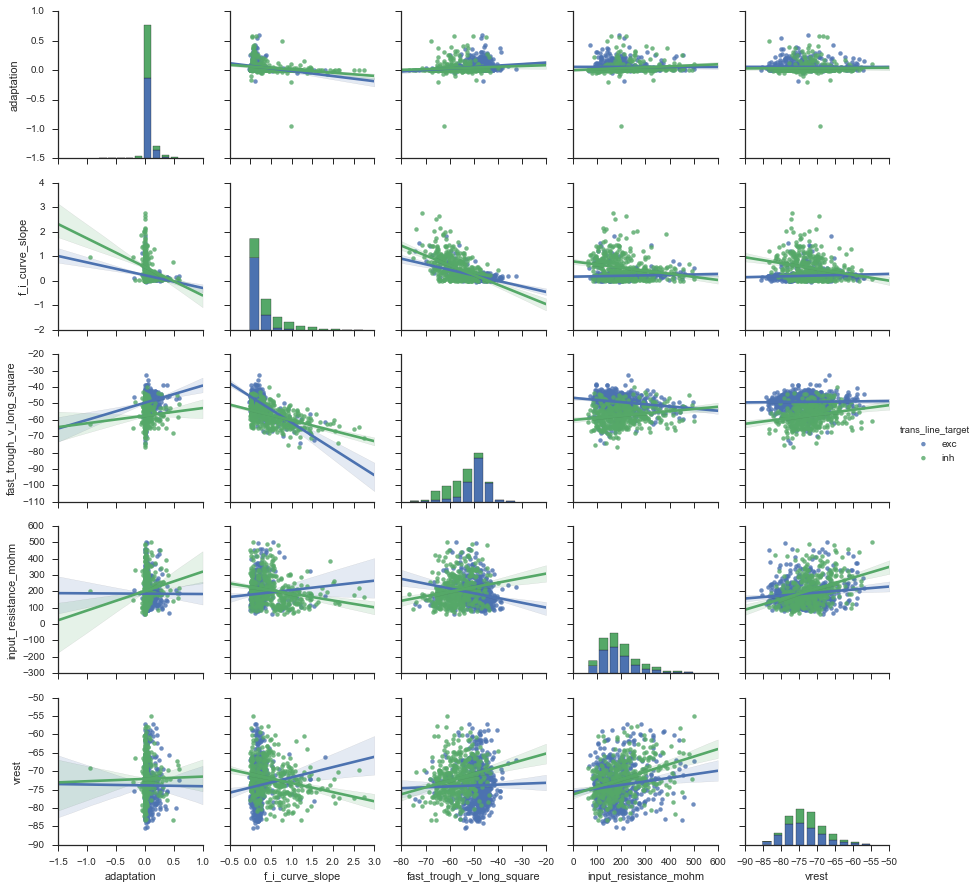

In [204]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='trans_line_target', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'])

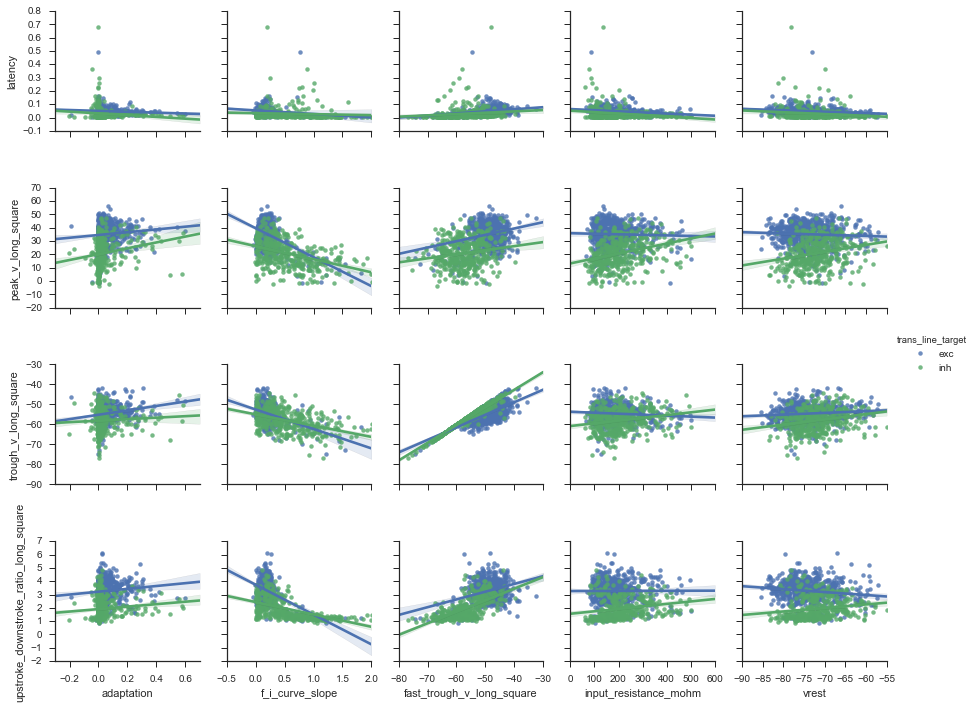

In [205]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='trans_line_target', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'])

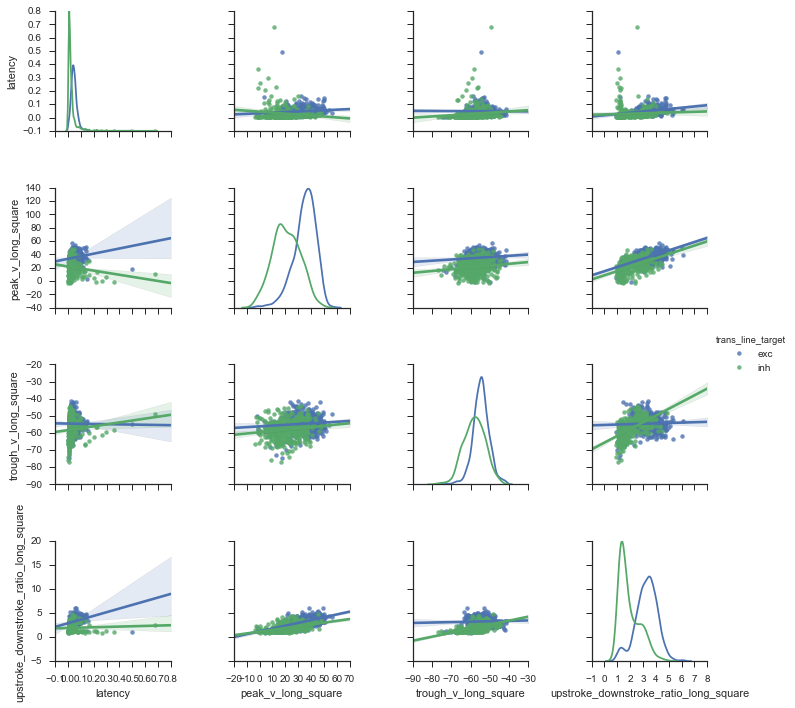

In [183]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse,kind='reg', hue='trans_line_target', x_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'])



In [212]:
fAHP_amplitude = ef_df_mouse['threshold_v_long_square']-ef_df_mouse['fast_trough_v_long_square']
spike_height = ef_df_mouse['peak_v_long_square']-ef_df_mouse['threshold_v_long_square']

ef_df['fAHP_amplitude']= pd.Series(fAHP_amplitude, index=ef_df.index)
ef_df['spike_height']= pd.Series(spike_height, index=ef_df.index)
ef_df_mouse.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,trans_line_target,fAHP_amplitude,spike_height
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,3.904747,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,exc,9.718754,83.156254
1,0.064384,76.283333,26.135000,0.195247,1.102660,4.005247,1.024873,-48.718750,-49.875001,-51.500004,...,4.231335,4.299535,3.939083,-78.593750,-66.085068,spiny,Chrna2-Cre_OE25,exc,4.499996,100.718758
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,2.026000,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,inh,13.875000,45.312504
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,4.208485,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,exc,10.749996,71.437504
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,2.992793,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,exc,8.406254,53.468752


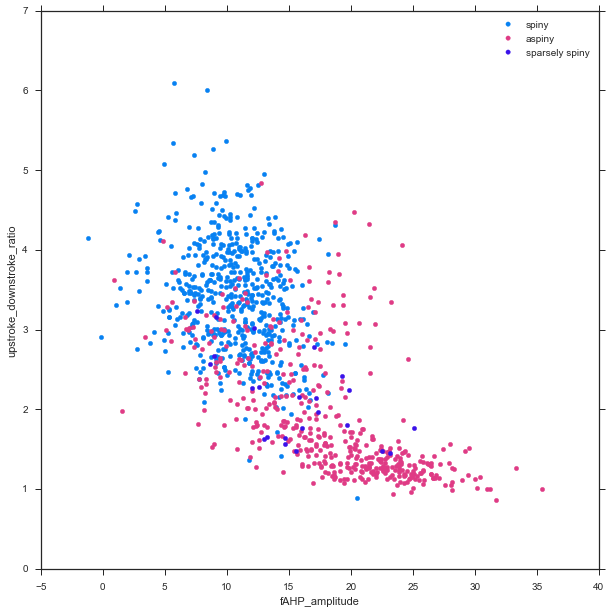

In [213]:

fig = plt.figure(figsize=(10,10))

for d_type, color in [["spiny", "#0781f2"], ["aspiny", "#df3b85"],["sparsely spiny", "#3a12ea"] ]:
    df = ef_df_mouse[ef_df_mouse['dendrite_type'] == d_type]
    plt.scatter(df['fAHP_amplitude'], 
                df['upstroke_downstroke_ratio_long_square'], 
                color=color, label=d_type)

    plt.xlabel("fAHP_amplitude")
    plt.ylabel('upstroke_downstroke_ratio')
    plt.legend(loc='best')
    
plt.show()

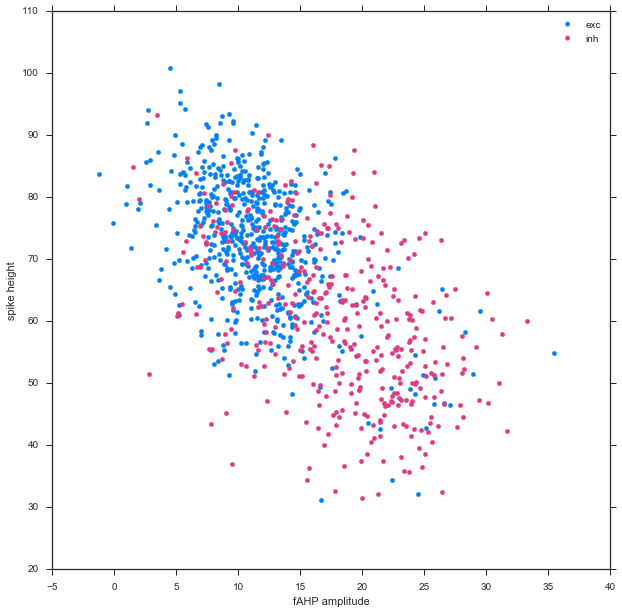

In [216]:

fig = plt.figure(figsize=(10,10))

for d_type, color in [["exc", "#0781f2"], ["inh", "#df3b85"]]:
    df = ef_df_mouse[ef_df_mouse['trans_line_target'] == d_type]
    plt.scatter(df['fAHP_amplitude'], 
                df['spike_height'], 
                color=color, label=d_type)

    plt.xlabel("fAHP amplitude")
    plt.ylabel("spike height")
    plt.legend(loc='best')
    
plt.show()

In [312]:
# filter down to a specific cell population
spiny_ephys_features = ef_df_mouse[ef_df_mouse['dendrite_type']== 'spiny']
aspiny_ephys_features = ef_df_mouse[ef_df_mouse['dendrite_type']== 'aspiny']
spiny_ephys_features.head()


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,trans_line_target,fAHP_amplitude,spike_height
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,3.904747,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,exc,9.718754,83.156254
1,0.064384,76.283333,26.135000,0.195247,1.102660,4.005247,1.024873,-48.718750,-49.875001,-51.500004,...,4.231335,4.299535,3.939083,-78.593750,-66.085068,spiny,Chrna2-Cre_OE25,exc,4.499996,100.718758
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,4.208485,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,exc,10.749996,71.437504
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,2.992793,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,exc,8.406254,53.468752
10,0.542358,307.100000,9.275000,0.155347,1.085160,8.536707,1.025427,-47.000000,-46.927086,-55.093753,...,2.718901,2.528137,3.060707,-95.500008,-80.050621,spiny,Ntsr1-Cre_GN220,exc,13.031250,74.750004


In [313]:
aspiny_ephys_features.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,trans_line_target,fAHP_amplitude,spike_height
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,2.026000,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,inh,13.875000,45.312504
7,0.025413,59.215625,10.571250,0.397263,1.230720,4.531655,1.024268,-54.718750,-54.687503,-59.166670,...,1.473594,1.444992,1.653886,-94.312508,-70.492218,aspiny,Scnn1a-Tg2-Cre,exc,19.937500,57.500002
8,0.020972,50.538421,51.966872,0.441304,1.117355,1.598333,1.028003,-51.906254,-51.354170,-52.833337,...,3.043080,3.364607,3.081809,-105.687508,-63.734398,aspiny,Rorb-IRES2-Cre,exc,11.437500,54.562505
9,0.002560,18.282170,16.385625,0.656473,1.050440,7.520155,1.024666,-59.500000,-58.125004,-61.609378,...,1.608589,1.487978,1.822781,-89.437508,-73.008224,aspiny,Pvalb-IRES-Cre,inh,23.812496,56.625004
11,0.055229,65.199643,1.310625,0.290424,1.194985,2.613015,1.025615,-47.218750,-48.593753,-52.875002,...,1.560665,1.427969,1.429838,-98.750000,-63.318256,aspiny,Htr3a-Cre_NO152,inh,9.000000,45.093750


In [314]:
print 'aspiny data number', len(aspiny_ephys_features)
print 'spiny data number', len(spiny_ephys_features)

aspiny data number 455
spiny data number 574


In [315]:
aspiny_ephys_features=aspiny_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])
spiny_ephys_features=spiny_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])

In [339]:
s=pd.concat([spiny_ephys_features.mean(),spiny_ephys_features.std(),aspiny_ephys_features.mean(),
             aspiny_ephys_features.std()],axis=1)
s.columns=['spiny_mean','spiny std','aspiny_mean','aspiny_std']

s



,spiny_mean,spiny std,aspiny_mean,aspiny_std
adaptation,0.056937,0.076670,0.028903,0.096254
avg_isi,80.974440,51.666433,38.766277,49.889659
f_i_curve_slope,0.170691,0.084163,0.551768,0.472901
fast_trough_v_long_square,-48.075133,3.629028,-57.480909,5.940967
input_resistance_mohm,183.006216,68.862375,205.015980,86.782359
latency,0.049186,0.021994,0.033017,0.063259
peak_v_long_square,36.360465,7.315477,20.451718,10.185663
slow_trough_v_long_square,-52.181459,10.810184,-29.617584,24.768242
threshold_v_long_square,-37.428137,4.165070,-39.273010,5.470106
trough_v_long_square,-54.074153,3.804056,-58.183725,5.417437


In [340]:
import scipy.stats as sst

stat,p_value=sst.ttest_ind(spiny_ephys_features.adaptation,aspiny_ephys_features.adaptation ,equal_var=False)

In [341]:
print stat, round(p_value,5) # p value is the % of chance to fails thehypothesis that the data sets are the same, so if
#lower that 5% then we assume these are two different data sets 

5.06756315388 0.0


In [342]:
stat,p_value=sst.ttest_ind(spiny_ephys_features.fAHP_amplitude,aspiny_ephys_features.fAHP_amplitude ,equal_var=False)

In [343]:
print stat, round(p_value,5)

-24.6110801931 0.0


In [362]:

for column in spiny_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(spiny_ephys_features[column],aspiny_ephys_features[column], equal_var=False)
    print column,  round(t_test_p_value,5)

adaptation 0.0
avg_isi 0.0
f_i_curve_slope 0.0
fast_trough_v_long_square 0.0
input_resistance_mohm 1e-05
latency 0.0
peak_v_long_square 0.0
slow_trough_v_long_square 0.0
threshold_v_long_square 0.0
trough_v_long_square 0.0
upstroke_downstroke_ratio_long_square 0.0
vm_for_sag 0.02054
vrest 0.0
fAHP_amplitude 0.0
spike_height 0.0


__cool there is a ststistical valid difference between spiny and aspiny groups__

In [367]:
exc_ephys_features = ef_df_mouse[ef_df_mouse['trans_line_target']== 'exc']
inh_ephys_features = ef_df_mouse[ef_df_mouse['trans_line_target']== 'inh']
print 'exc data number', len(exc_ephys_features)
print 'inh data number', len(inh_ephys_features)

exc data number 622
inh data number 407


In [368]:
exc_ephys_features=exc_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])
inh_ephys_features=inh_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])

In [369]:
t=pd.concat([exc_ephys_features.mean(),exc_ephys_features.std(),inh_ephys_features.mean(),
             inh_ephys_features.std()],axis=1)
t.columns=['exc_mean','exc std','inh_mean','inh_std']

t

,exc_mean,exc std,inh_mean,inh_std
adaptation,0.054300,0.075499,0.033059,0.102440
avg_isi,77.089891,51.848067,39.496418,51.981794
f_i_curve_slope,0.206488,0.184674,0.535381,0.477812
fast_trough_v_long_square,-49.021757,4.926225,-57.331007,6.059070
input_resistance_mohm,186.039644,73.471852,205.545908,87.015283
latency,0.047877,0.029316,0.028761,0.050286
peak_v_long_square,35.078076,8.633119,20.848818,10.437049
slow_trough_v_long_square,-49.725283,15.182800,-29.033631,24.652910
threshold_v_long_square,-37.599730,4.398138,-39.581236,5.257400
trough_v_long_square,-54.564160,4.258570,-57.997392,5.490959


In [370]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(exc_ephys_features[column],inh_ephys_features[column], equal_var=False)
    print column,  round(t_test_p_value,5)

adaptation 0.00035
avg_isi 0.0
f_i_curve_slope 0.0
fast_trough_v_long_square 0.0
input_resistance_mohm 0.0002
latency 0.0
peak_v_long_square 0.0
slow_trough_v_long_square 0.0
threshold_v_long_square 0.0
trough_v_long_square 0.0
upstroke_downstroke_ratio_long_square 0.0
vm_for_sag 0.33829
vrest 0.0
fAHP_amplitude 0.0
spike_height 0.0


__cool - there is valid difference when I divide my group for exc and inh populations__

In [371]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(exc_ephys_features[column],spiny_ephys_features[column], equal_var=False)
    print column,ststistic,  round(t_test_p_value,5)

adaptation -0.598579585946 0.54957
avg_isi -1.2968353337 0.19494
f_i_curve_slope 4.3677533572 1e-05
fast_trough_v_long_square -3.80297306263 0.00015
input_resistance_mohm 0.737015953659 0.46126
latency -0.878002744829 0.38013
peak_v_long_square -2.77824627932 0.00555
slow_trough_v_long_square 3.24137610611 0.00122
threshold_v_long_square -0.692934009496 0.48849
trough_v_long_square -2.10152383163 0.0358
upstroke_downstroke_ratio_long_square -3.08497274216 0.00208
vm_for_sag 0.254020500393 0.79952
vrest 0.493408079986 0.62182
fAHP_amplitude 3.50489645786 0.00047
spike_height -2.03014115113 0.04256


In [372]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(inh_ephys_features[column],aspiny_ephys_features[column], equal_var=False)
    print column,ststistic,  round(t_test_p_value,5)

adaptation 0.611661317321 0.54093
avg_isi 0.209819760359 0.83386
f_i_curve_slope -0.50513392864 0.6136
fast_trough_v_long_square 0.365970557302 0.71448
input_resistance_mohm 0.0893756448386 0.9288
latency -1.09863042696 0.27224
peak_v_long_square 0.56403645822 0.57288
slow_trough_v_long_square 0.346416880007 0.72912
threshold_v_long_square -0.843033617598 0.39945
trough_v_long_square 0.500536550344 0.61683
upstroke_downstroke_ratio_long_square 0.210359511219 0.83344
vm_for_sag -1.00531078425 0.31503
vrest -0.104590366024 0.91673
fAHP_amplitude -1.13226017458 0.25785
spike_height 0.827231597952 0.40834


__hmmm ... there is still a valid difference between exc and spiny group, but in case of lower number of variables,
but no differences between inh and aspiny cells  - maybe some cells populations are wrongly assigned to exc inh groups__